In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/Users/eawe.fellow/Audio-Recommendation-Algorithm/music machine learning projecy data.csv')

In [6]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

In [7]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'topic', 'age'],
      dtype='object')

In [10]:
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,42948.166878,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,24747.811462,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,20393.500000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,45407.000000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,64089.500000,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


## Univariate Analysis

/Users/eawe.fellow/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='violence', ylabel='Count'>

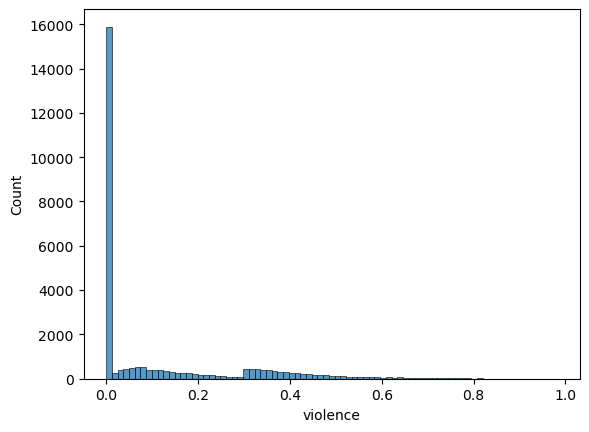

In [7]:
sns.histplot(data=df,  x='violence')

In [5]:
df['release_date'].value_counts()

release_date
2017    660
2018    653
2015    617
2009    596
2012    588
       ... 
1955    106
1952     59
1951     58
1950     51
1953     48
Name: count, Length: 70, dtype: int64

/Users/eawe.fellow/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='release_date', ylabel='Count'>

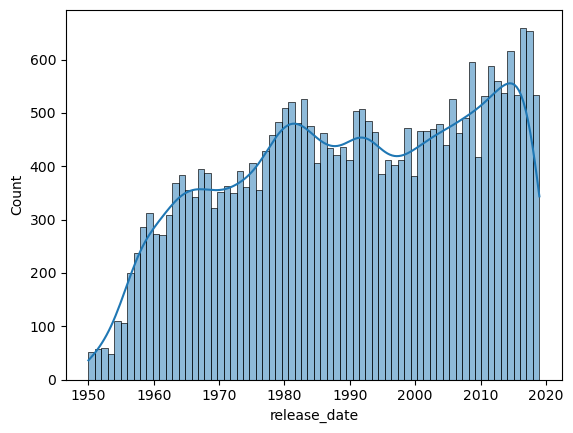

In [6]:
sns.histplot(df['release_date'], kde=True, bins=70)

In [17]:
# Assuming you have a DataFrame 'df' with columns 'Year' and 'Genre' containing the year and genre of each song respectively
# Example:
# df = pd.DataFrame({'Year': [2019, 2019, 2020, 2020, 2021], 'Genre': ['Pop', 'Rock', 'Pop', 'Hip-hop', 'Hip-hop']})

# Read your dataset into a DataFrame or create one with your data
# Replace this with your actual data loading process
# df = pd.read_csv('your_dataset.csv')

# Group by year and genre, then count occurrences
genre_counts = df.groupby(['release_date', 'genre']).size().reset_index(name='Count')

# Find the index of the maximum count for each year
max_genre_index = genre_counts.groupby('release_date')['Count'].idxmax()

# Extract the most common genre for each year
most_common_genres = genre_counts.loc[max_genre_index]

print(most_common_genres)

     release_date    genre  Count
2            1950     jazz     23
6            1951     jazz     26
9            1952     jazz     27
13           1953     jazz     25
17           1954     jazz     80
..            ...      ...    ...
400          2015      pop    158
407          2016      pop    129
412          2017  hip hop    152
417          2018    blues    126
426          2019  hip hop    120

[70 rows x 3 columns]


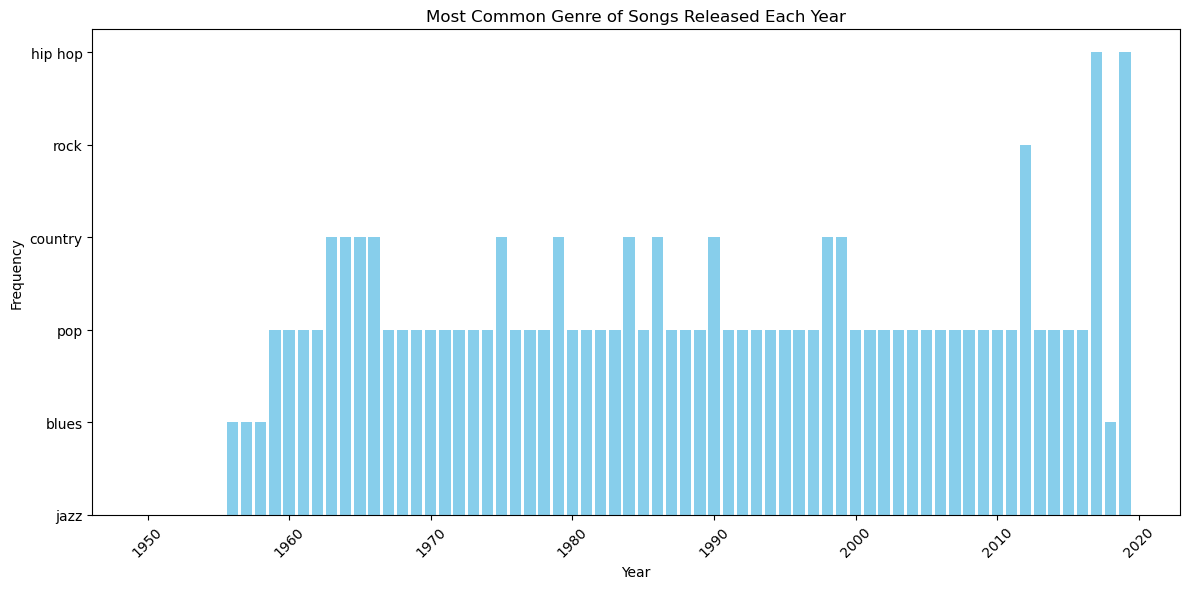

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(most_common_genres['release_date'], most_common_genres['genre'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Most Common Genre of Songs Released Each Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

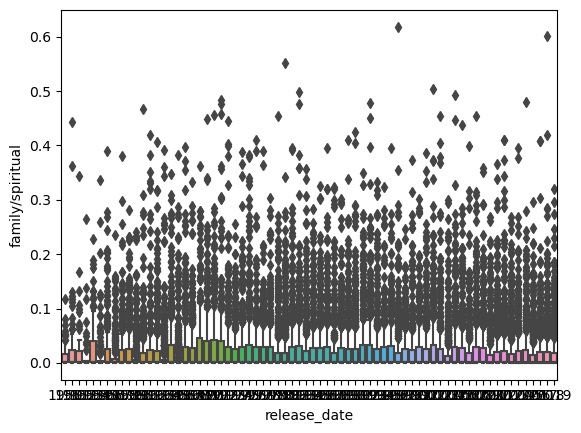

In [9]:
sns.boxplot(data=df, x="release_date", y="family/spiritual")
plt.show()

In [12]:

# Assuming 'release_date' is a datetime column, you can extract the year part like this:
#df['release_year'] = df['release_date'].dt.year

# If 'release_date' is a string column with year information, I can directly use it:
# df['release_year'] = pd.to_datetime(df['release_date']).dt.year

# Group by 'release_year' and calculate the average of 'obscene' for each year
average_obscenity_by_year = df.groupby('release_date')['obscene'].mean()

# Display the result
print(average_obscenity_by_year)


release_date
1950    0.052309
1951    0.087230
1952    0.052122
1953    0.081366
1954    0.063935
          ...   
2015    0.155972
2016    0.140229
2017    0.204572
2018    0.203350
2019    0.223229
Name: obscene, Length: 70, dtype: float64


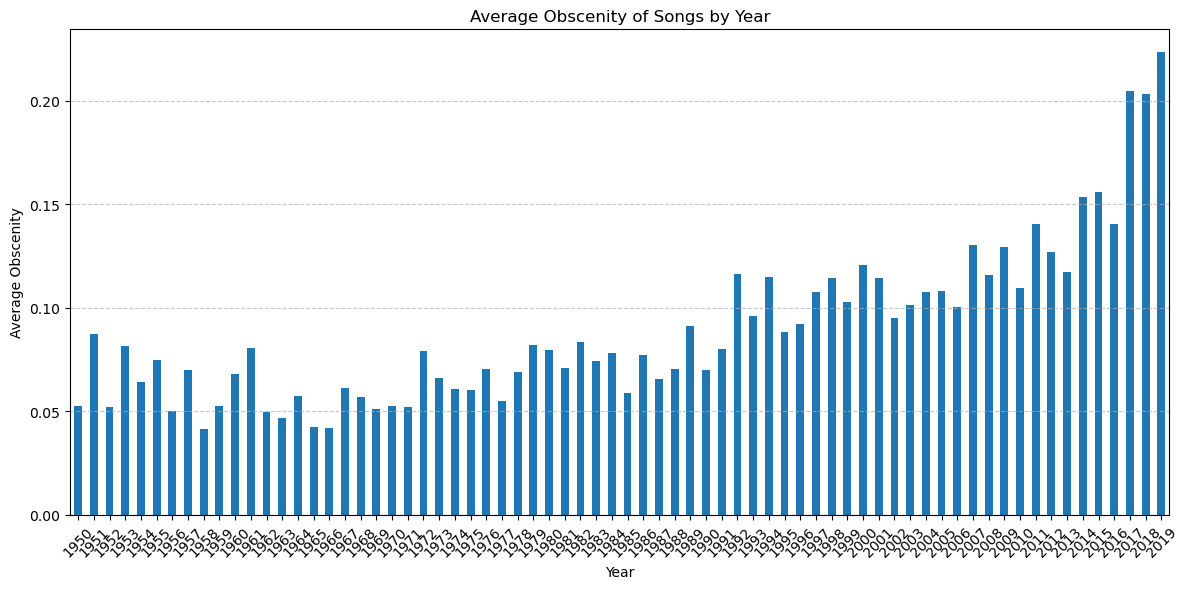

In [15]:
average_obscenity_by_year.plot(kind='bar', figsize=(12, 6))
plt.title('Average Obscenity of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Average Obscenity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [18]:
# Group by 'release_year' and calculate the average of 'obscene' for each year
average_family_spiritual_by_year = df.groupby('release_date')['family/spiritual'].mean()

# Display the result
print(average_family_spiritual_by_year)

release_date
1950    0.015479
1951    0.033611
1952    0.024363
1953    0.018005
1954    0.028536
          ...   
2015    0.021190
2016    0.018427
2017    0.017820
2018    0.020048
2019    0.021071
Name: family/spiritual, Length: 70, dtype: float64


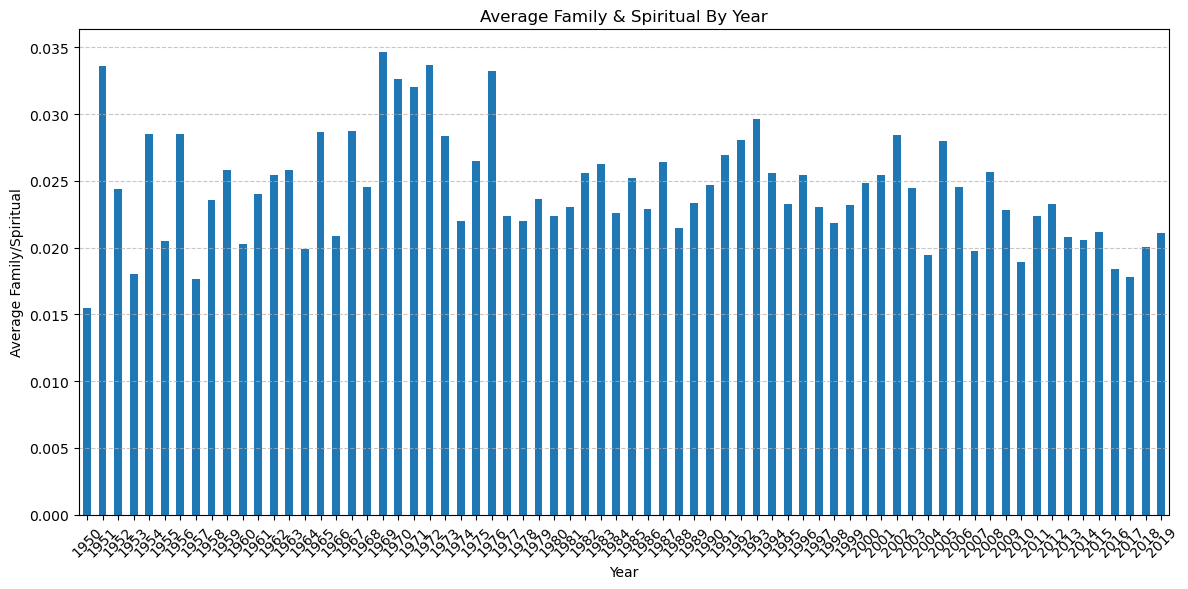

In [19]:
average_family_spiritual_by_year.plot(kind='bar', figsize=(12, 6))
plt.title('Average Family & Spiritual By Year')
plt.xlabel('Year')
plt.ylabel('Average Family/Spiritual')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
average_romantic_by_year = df.groupby('release_date')['romantic'].mean()

# Display the result
print(average_romantic_by_year)

release_date
1950    0.135516
1951    0.074866
1952    0.128255
1953    0.129784
1954    0.116736
          ...   
2015    0.031170
2016    0.033833
2017    0.024418
2018    0.020660
2019    0.020531
Name: romantic, Length: 70, dtype: float64


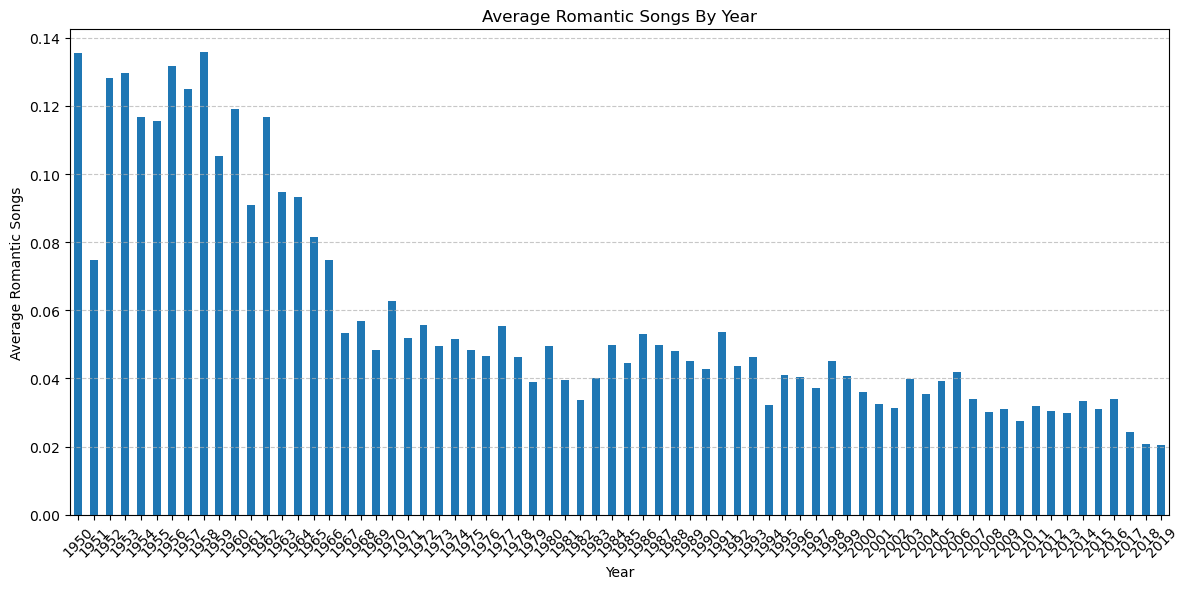

In [21]:
average_romantic_by_year.plot(kind='bar', figsize=(12, 6))
plt.title('Average Romantic Songs By Year')
plt.xlabel('Year')
plt.ylabel('Average Romantic Songs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()